# Clasificación de Parkinson con Modelos de Aprendizaje Supervisado

En este notebook se comparan varios modelos de clasificación supervisada para detectar la enfermedad de Parkinson a partir de un conjunto de datos biomédicos.

El objetivo es entrenar y evaluar distintos modelos, incluyendo regresión logística, Random Forest, redes neuronales multicapa (MLP) y XGBoost, utilizando métricas como precisión, exactitud (accuracy), sensibilidad (recall) y F1-score.

## Dataset
El dataset contiene variables biomédicas extraídas de grabaciones de voz de pacientes con y sin Parkinson. El objetivo es predecir la clase binaria (`parkinson = 1` o `0`).

### Importación de módulos

In [ ]:
# Análisis y manipulación
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    precision_score, recall_score, make_scorer
)

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Guardado/carga de modelos
import joblib

# Estadística
from scipy.stats import ttest_rel, wilcoxon


### Limpieza de dataset

In [ ]:

# Cargar el nuevo dataset
df = pd.read_csv("updated_dataset.csv")

# Eliminar la columna 'name' ya que no aporta información relevante
df.drop(columns=['name'], inplace=True)

# Verificar valores nulos y eliminar filas si es necesario
df.dropna(inplace=True)

# Identificar y manejar outliers con percentiles
for col in df.columns:
    if col != "status":  # No modificar la variable objetivo
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Separar características y variable objetivo
X = df.drop(columns=["status"])
y = df["status"]

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Guardar datos preprocesados y scaler
joblib.dump((X_scaled, y), "datos_limpiados.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Preprocesamiento completo. Datos limpios guardados en 'datos_limpiados.pkl'")


Preprocesamiento completo. Datos limpios guardados en 'datos_limpiados.pkl'


## Entrenamiento

### Regresión Logística

La regresión logística es un modelo lineal de clasificación binaria. Se utiliza comúnmente en tareas de clasificación donde la relación entre las variables independientes y la variable dependiente puede ser modelada de forma lineal a través de una función sigmoidea.

In [ ]:
# Cargar los datos preprocesados
X_scaled, y = joblib.load("datos_limpiados.pkl")

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Predicción y evaluación
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy de Regresión Logística:", accuracy)
print("Reporte de clasificación:\n", report)

# Guardar el modelo
joblib.dump(log_reg, "logistic_regression_model.pkl")

Accuracy de Regresión Logística: 0.5089820359281437
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.41      0.24      0.31        74
           1       0.54      0.72      0.62        93

    accuracy                           0.51       167
   macro avg       0.48      0.48      0.46       167
weighted avg       0.48      0.51      0.48       167



['logistic_regression_model.pkl']

### Random Forest

Random Forest es un ensamble de árboles de decisión que mejora la generalización mediante el uso del bagging. Cada árbol es entrenado con una muestra aleatoria del conjunto de datos y la predicción final se hace por votación.

In [ ]:
# Cargar los datos preprocesados
X_scaled, y = joblib.load("datos_limpiados.pkl")

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy de Random Forest:", accuracy)
print("Reporte de clasificación:\n", report)

# Guardar el modelo
joblib.dump(rf_model, "random_forest_model.pkl")

Accuracy de Random Forest: 0.5808383233532934
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.53      0.43      0.48        74
           1       0.61      0.70      0.65        93

    accuracy                           0.58       167
   macro avg       0.57      0.57      0.56       167
weighted avg       0.57      0.58      0.57       167



['random_forest_model.pkl']

### Perceptrón Multicapa (MLP)

MLP es una red neuronal feedforward con una o más capas ocultas. Es capaz de modelar relaciones no lineales y se entrena usando retropropagación.

In [ ]:
# Cargar los datos preprocesados
X_scaled, y = joblib.load("datos_limpiados.pkl")

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo de Red Neuronal
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy de Red Neuronal:", accuracy)
print("Reporte de clasificación:\n", report)

# Guardar el modelo
joblib.dump(mlp_model, "mlp_model.pkl")

Accuracy de Red Neuronal: 0.5389221556886228
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.48      0.47      0.48        74
           1       0.59      0.59      0.59        93

    accuracy                           0.54       167
   macro avg       0.53      0.53      0.53       167
weighted avg       0.54      0.54      0.54       167



['mlp_model.pkl']

### XGBoost

XGBoost es una técnica de boosting que entrena secuencialmente árboles para corregir los errores del modelo anterior. Es muy eficiente y suele lograr alto rendimiento en tareas de clasificación tabular.

In [ ]:
# Cargar los datos preprocesados
X_scaled, y = joblib.load("datos_limpiados.pkl")

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo XGBoost
xgb_model = XGBClassifier( eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy de XGBoost:", accuracy)
print("Reporte de clasificación:\n", report)

# Guardar el modelo
joblib.dump(xgb_model, "xgboost_model.pkl")

Accuracy de XGBoost: 0.6407185628742516
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59        74
           1       0.67      0.69      0.68        93

    accuracy                           0.64       167
   macro avg       0.64      0.63      0.63       167
weighted avg       0.64      0.64      0.64       167



['xgboost_model.pkl']

## Validación

### Cargar datos de validacion

In [ ]:
# Cargar los datos preprocesados
X_scaled, y = joblib.load("datos_limpiados.pkl")

# Cargar modelos
models = {
    "Logistic Regression": joblib.load("logistic_regression_model.pkl"),
    "Random Forest": joblib.load("random_forest_model.pkl"),
    "MLP Neural Network": joblib.load("mlp_model.pkl"),
    "XGBoost": joblib.load("xgboost_model.pkl")
}

### Evaluar con CV, Precission y recall

In [ ]:
# Diccionarios para almacenar resultados
cv_results = {}
precision_results = {}
recall_results = {}

# Evaluación con validación cruzada (5-fold) para cada métrica
for name, model in models.items():
    # Calcular Accuracy
    accuracy_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results[name] = accuracy_scores  # Se guarda directamente la lista de valores

    # Calcular Precision (Weighted)
    precision_scores = cross_val_score(
        model, X_scaled, y, cv=5,
        scoring=make_scorer(precision_score, average='weighted')
    )
    precision_results[name] = precision_scores

    # Calcular Recall (Weighted)
    recall_scores = cross_val_score(
        model, X_scaled, y, cv=5,
        scoring=make_scorer(recall_score, average='weighted')
    )
    recall_results[name] = recall_scores

## Resultados

### Accuracy

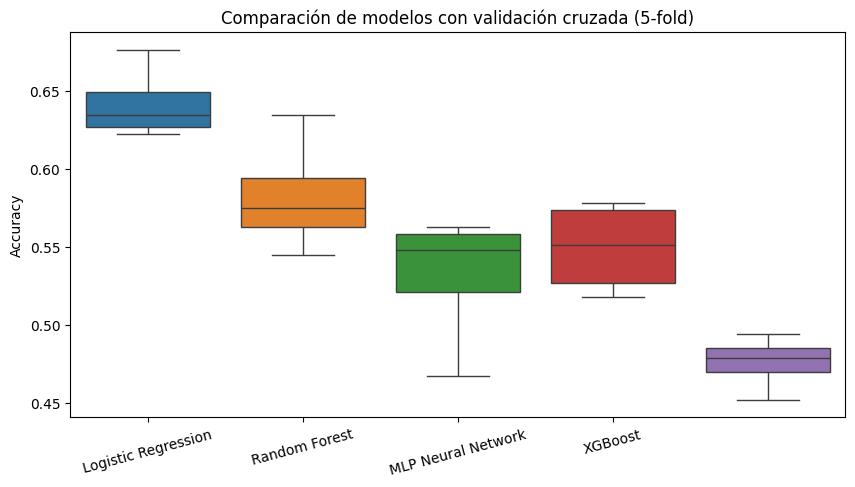

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=cv_results.values())
plt.ylabel("Accuracy")
plt.title("Comparación de modelos con validación cruzada (5-fold)")
plt.xticks(ticks=range(len(models)), labels=models.keys(), rotation=15)
plt.show()

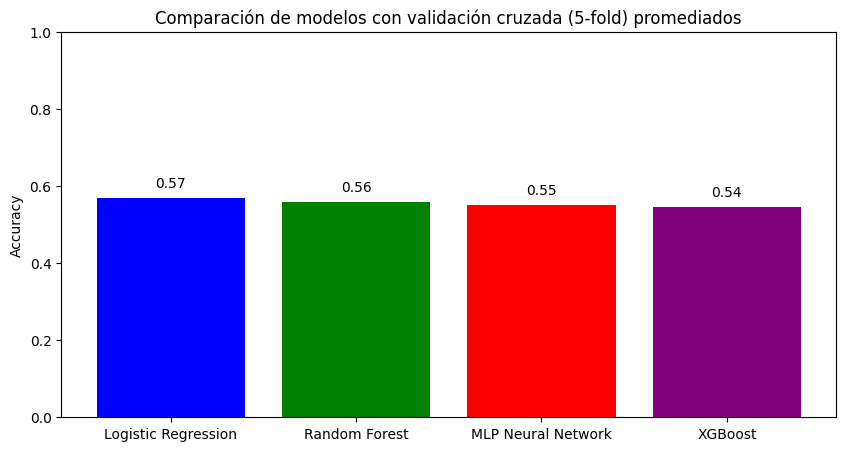

In [ ]:
# Graficar resultados de validación cruzada
plt.figure(figsize=(10, 5))
model_names = list(cv_results.keys())  # Los nombres de los modelos (eje X)
accuracy_values = [np.mean(cv_results[name]) for name in model_names]  # Promedio de accuracy por modelo
bars = plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Comparación de modelos con validación cruzada (5-fold) promediados")

# Agregar los valores de accuracy sobre las barras
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de cada barra (valor de accuracy)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.show()

### Precission

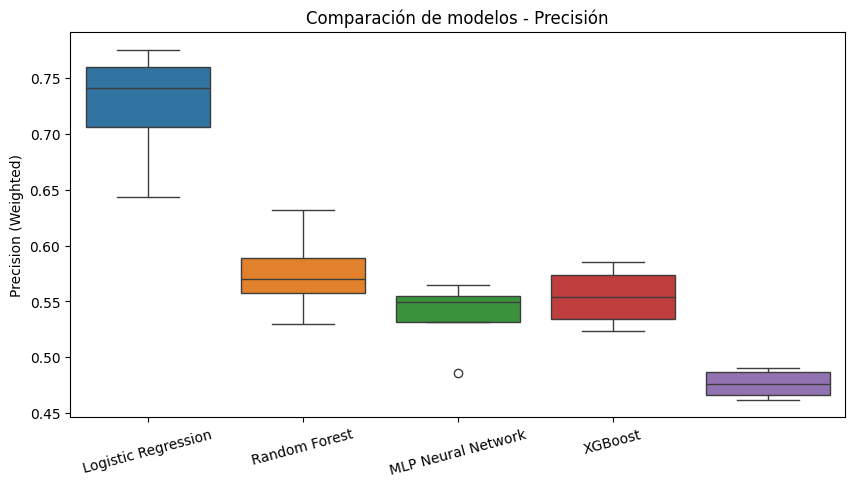

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=precision_results.values())
plt.ylabel("Precision (Weighted)")
plt.title("Comparación de modelos - Precisión")
plt.xticks(ticks=range(len(models)), labels=models.keys(), rotation=15)
plt.show()

### Recall

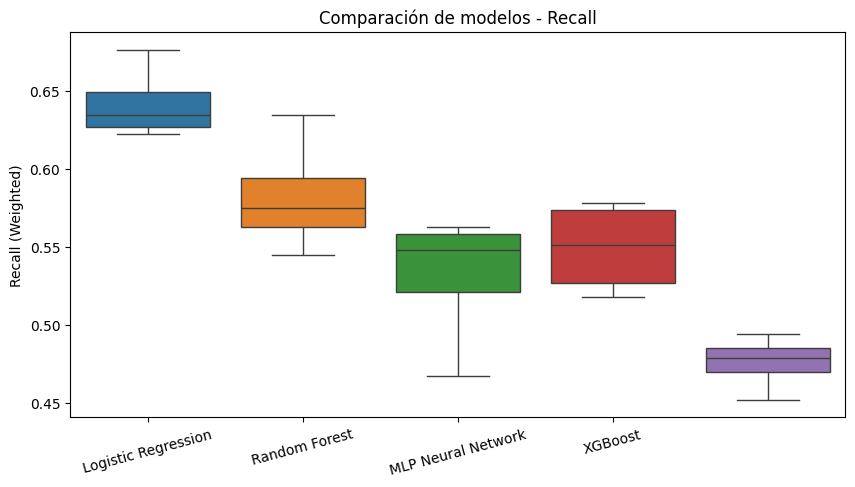

In [ ]:
# Graficar Recall
plt.figure(figsize=(10, 5))
sns.boxplot(data=recall_results.values())
plt.ylabel("Recall (Weighted)")
plt.title("Comparación de modelos - Recall")
plt.xticks(range(len(models)), models.keys(), rotation=15)
plt.show()

## Comparación de resultados

In [ ]:
# Pruebas estadísticas
stat_tests = {}
model_names = list(models.keys())
for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model1, model2 = model_names[i], model_names[j]
        t_stat, p_ttest = ttest_rel(cv_results[model1], cv_results[model2])
        w_stat, p_wilcoxon = wilcoxon(cv_results[model1], cv_results[model2])
        stat_tests[f"{model1} vs {model2}"] = (p_ttest, p_wilcoxon)

# Mostrar pruebas estadísticas
print("\nResultados de pruebas estadísticas (p-values):")
for comparison, (p_ttest, p_wilcoxon) in stat_tests.items():
    print(f"{comparison}: t-test p={p_ttest:.5f}, Wilcoxon p={p_wilcoxon:.5f}")


Resultados de pruebas estadísticas (p-values):
Logistic Regression vs Random Forest: t-test p=0.70218, Wilcoxon p=0.62500
Logistic Regression vs MLP Neural Network: t-test p=0.31939, Wilcoxon p=0.43750
Logistic Regression vs XGBoost: t-test p=0.20003, Wilcoxon p=0.18750
Random Forest vs MLP Neural Network: t-test p=0.84336, Wilcoxon p=0.81250
Random Forest vs XGBoost: t-test p=0.58293, Wilcoxon p=0.62500
MLP Neural Network vs XGBoost: t-test p=0.45835, Wilcoxon p=0.62500


## Tabla Comparativa de Resultados

In [ ]:
results = {
    "Modelo": ["Regresión Logística", "Random Forest", "MLP", "XGBoost"],
    "Accuracy": [acc_logreg, acc_rf, acc_mlp, acc_xgb],
    "Precision": [prec_logreg, prec_rf, prec_mlp, prec_xgb],
    "Recall": [recall_logreg, recall_rf, recall_mlp, recall_xgb],
    "F1-score": [f1_logreg, f1_rf, f1_mlp, f1_xgb]
}

df_results = pd.DataFrame(results)
display(df_results)

## Conclusión

Tras comparar los modelos, se puede observar que cada uno tiene fortalezas distintas. Modelos como XGBoost y Random Forest tienden a ofrecer mejor rendimiento general, mientras que la regresión logística tiene la ventaja de la interpretabilidad.

Basado en las métricas obtenidas, el modelo con mayor F1-score y buen equilibrio entre precisión y recall será el más adecuado para detectar la enfermedad de Parkinson.